In [1]:
# Notebook for creating DoG filters

# Approach

# Define sobel
# Define gaussian of suitable size
# Convolve sobel in x direction with Gaussian
# Rotate for 16 orientations between 0 and 360 degrees
# Repeat process for a different sigma
# Return filters
# Visualize

In [2]:
import cv2
import numpy as np let me know if any of these slots work for the team. 
from numpy import sqrt, pi, reshape
import matplotlib.pyplot as plt

In [18]:
sobel_x = [[1, 0, -1], [2, 0, -2], [1, 0, -1]] # Sobel filter in x direction
sobel_y = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]] # Sobel filter in y direction

def get_2d_gaussian(grid, sigma, elongation=1):
    """
    Returns a 2D Gaussian filter
    """
    x = grid[0]
    y = grid[1]
    sigma_x = sigma
    sigma_y = sigma_x * elongation
    numerator = np.exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2)))
    denominator = 2 * pi * sigma_x * sigma_y
    return numerator / denominator

sigma = 2
size = 7
bound = size // 2
spread = np.linspace(-bound, bound, size)    
x , y = np.meshgrid(spread, spread)
points = [x.flatten(), y.flatten()]

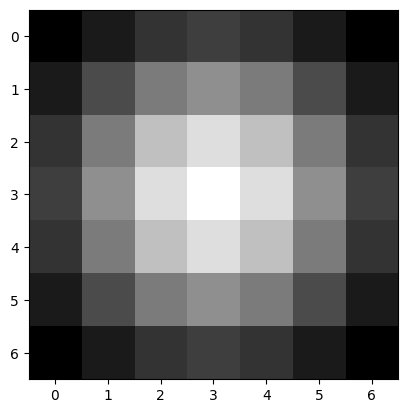

In [28]:
gaussian = get_2d_gaussian(points, sigma)
gaussian = reshape(gaussian, (size, size))
plt.subplot(1,1,1)
plt.imshow(gaussian, cmap='gray')

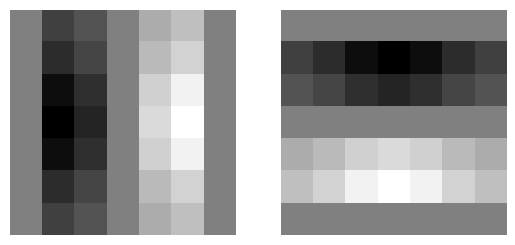

In [33]:
Gx = cv2.filter2D(gaussian, ddepth=-1, kernel = np.array(sobel_x))
Gy = cv2.filter2D(gaussian, ddepth=-1, kernel = np.array(sobel_y))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(Gx, cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(Gy, cmap='gray')

In [71]:
# DOG Filter bank

scale_sigma = [1 , sqrt(2)]
size = 49
angles = 16
bounds = size // 2
spread = np.linspace(-bounds, bounds, size)
x, y = np.meshgrid(spread, spread)
points = [x.flatten(), y.flatten()]

DOG_filters = []

for sigma in scale_sigma:
    gaussian = get_2d_gaussian(points, sigma)
    gaussian = reshape(gaussian, (size, size))
    DOG = cv2.filter2D(gaussian, ddepth=-1, kernel = np.array(sobel_x))
    for i in range(angles):
        angle = i * 360 / angles
        rot_matrix = cv2.getRotationMatrix2D((size//2, size//2), angle, 1)
        DOG_rot = cv2.warpAffine(DOG, rot_matrix, (size, size))
        DOG_filters.append(DOG_rot)


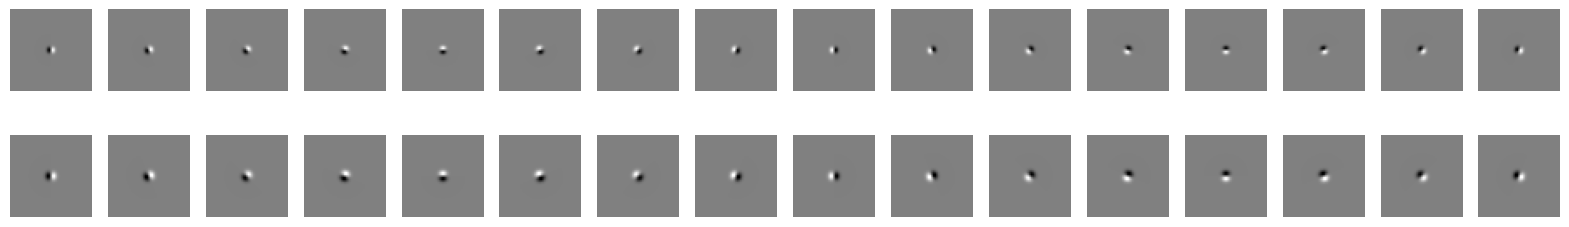

In [72]:
plt.figure(figsize=(20, 3))
for i in range(len(DOG_filters)):
    plt.subplot(2, 16, i+1)
    plt.axis('off')
    plt.imshow(DOG_filters[i], cmap='gray')